# Data Preprocessing

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

### Importing necessary libraries

In [2]:
# #Only need to run once
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')


In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string


### Reading in the dataset

In [4]:
twitter = pd.read_csv('dataset.csv', header = None)

In [5]:
twitter.info()
twitter.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       100000 non-null  int64 
 1   1       100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


,0,1
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


A few observations:
1. There are no missing rows
2. We should remove user tags (@...), website links (http,https) on top of our normal preprocessing process as these provide no value to the sentiment of the tweet and would act as noise to our model, affecting its performance

In [6]:
 # Renaming our columns
twitter = twitter.rename(columns = {0:'sentiment',1:'tweets'})
twitter.sample(5)

,sentiment,tweets
95477,1,@imoan buy me lunch and I'll give you a phone
90759,1,You are ALL just so amazing! There's something...
17437,0,he said he would call me sometime tomoro to le...
99265,1,@Muzzzza I forgot I had a colour choice! Damn!...
91381,1,@MissyHannon Don't worry...i can watch the Joh...


# Data Preprocessing

## Cleaning Text

In [7]:
# Stopwords
sw = set(stopwords.words('english'))
# Adding words that are common in both negative and positive tweets into stopwords to remove them, as they do not provide much value and might affect the model's performance
sw.update(['im','today','time','work','go','twitter','got','day','get','tomorrow','tweet'])
# Stopwords that we want to keep in our tweets as this looks important in determining the sentiment direction of a tweet
elements_to_remove = ["no","not","nor","only","don't","aren't", "didn't","couldn't","doesn't","hadn't","hasn't","isn't","mightn't",
               "mustn't","needn't","shan't","shouldn't","wasn't","weren't","won't","wouldn't"]
for word in elements_to_remove:
  sw.remove(word)

In [8]:
#Creating a stemmer object, which reduces a word into its root form
pstem = PorterStemmer()


# Defining a function to preprocess tweets
def clean_tweet(row):
    #lowercase all letters
    text = row.lower()
    # Removing links (https|http)
    text = re.sub(r'https*\S+','',text)
    # Removing user mentions (@)
    text = re.sub(r'(@[A-za-z0-9_]+)','',text)
    # Only keeping alphanumeric characters and whitespaces
    text = re.sub(r'[^\w\s]','',text)
    # Replace 3 or more consecutive letters by 2 letters (soooo goood  --> soo good)
    text = re.sub(r"(.)\1\1+", r"\1\1", text)
    # Removing punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Removing stopwords
    text = " ".join(word for word in text.split() if word not in sw)
    # Converting words to their root form using the earlier defined stemmer
    text = " ".join(pstem.stem(word) for word in text.split())
    return text

In [9]:
#Creating a new column to store the cleaned tweets
twitter['preprocessed_tweets'] = twitter['tweets'].apply(clean_tweet)
twitter.head()

,sentiment,tweets,preprocessed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",aww that bummer shoulda david carr third
1,0,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...
2,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save 50 rest bound
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",no not behav mad cant see


## Creating a WordCloud for Positive and Negative tweets

### Positive Tweets

In [10]:
# positive_tweets = " ".join(twitter[twitter['sentiment'] == 1]['preprocessed_tweets'])
# plt.figure(figsize=(10,9))
# wordcloud = WordCloud(height =600, width = 600, max_font_size = 100, max_words = 100, stopwords = sw).generate(positive_tweets)
# plt.imshow(wordcloud,interpolation = 'bilinear')
# plt.axis('off')
# plt.show()

### Negative Tweets

In [11]:
# negative_tweets = " ".join(twitter[twitter['sentiment'] == 0]['preprocessed_tweets'])
# plt.figure(figsize=(10,9))
# wordcloud = WordCloud(height = 600, width = 600, max_font_size = 100, max_words = 100, stopwords = sw).generate(negative_tweets)
# plt.imshow(wordcloud,interpolation = 'bilinear')
# plt.axis('off')
# plt.show()

From the wordcloud, we can see that common words include

Positive tweets:
1. like
2. good
3. love
4. thank
5. lol

Negative tweets:
1. sorri
2. love
3. hate
4. sad
5. bad


However, it is weird that 'love' would be under the negative tweets, and we might want to take a closer look at those negative tweets that contain them.

In [12]:
list((twitter[(twitter['sentiment'] == 0) & (twitter['preprocessed_tweets'].str.contains('love')) ]['tweets']))[:10]


['@LettyA ahh ive always wanted to see rent  love the soundtrack!!',
 'Meh... Almost Lover is the exception... this track gets me depressed every time. ',
 '@julieebaby awe i love you too!!!! 1 am here  i miss you',
 "@mercedesashley Damn! The grind is inspirational and saddening at the same time.  Don't want you to stop cuz I like what u do! Much love",
 "I'm missing you babe..  but as long as your alive I'm happy.. Yawwwnn.. I'm tired my love imma try to sleep hopefully you had a headstart",
 "@robluketic  love the french. I tell people here in the south i'm qtr. french and they snarl at me.  french are beautiful people",
 '@DonnieWahlberg ooh I�m excited and not even going 2 be there  long love YOUTUBE!',
 "@riancurtis  i'm here, friend, and i love you.",
 '@austinhill I wish I was!  Sold out   If you have some time let me know, I would love to hear more about what you are up to!',
 'http://twitpic.com/2y2yi - I love you, Buck. ']

We can see some issues with the dataset

1. '@LettyA ahh ive always wanted to see rent  love the soundtrack!!'

2. '@austinhill I wish I was!  Sold out   If you have some time let me know, I would love to hear more about what you are up to!',

These tweets have been classified as  negative tweets when they are positive, this would affect the performance of our model and hence we would have to keep this in mind when training our model

## Preprocessing data

In [13]:
X = twitter['tweets'].values
y = twitter['sentiment'].values

# Splitting Into train and test sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Splitting into tran and test set, random_state used for reproducibility of results
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
X_train_clean = np.array(list(map(clean_tweet,X_train)))
X_test_clean =  np.array(list(map(clean_tweet,X_test)))

## Word Embedding

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,2))
X_train_tfidf = vectorizer.fit_transform(X_train_clean)
X_test_tfidf = vectorizer.transform(X_test_clean)
# vect = CountVectorizer()
# X_train_tfidf = vect.fit_transform(X_train)
# X_test_tfidf = vect.transform(X_test)

# Model Training

In [18]:
X_train_tfidf.shape

(70000, 324520)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 2, max_iter = 1000, n_jobs = -1)
log_reg.fit(X_train_tfidf,y_train)
log_reg_predictions = log_reg.predict(X_test_tfidf)

In [20]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score
print(f'Confusion Matrix:\n {confusion_matrix(y_test,log_reg_predictions)}')
print(f'\nRecall score:\n{recall_score(y_test,log_reg_predictions)}')
print(f'\nPrecision score:\n {precision_score(y_test,log_reg_predictions)}')
print(f'\nF1 score:\n {f1_score(y_test,log_reg_predictions)}')

Confusion Matrix:
 [[11844  3211]
 [ 3354 11591]]

Recall score:
0.7755771160923386

Precision score:
 0.7830698554249426

F1 score:
 0.7793054761824721


## Looking at the misclassifed tweets

In [21]:
# Create a DataFrame to store misclassified examples
misclassified_df = pd.DataFrame({'actual': y_test, 'predicted': log_reg_predictions, 'tweet': X_test})

# Filter false positives (negative tweets misclassified as positive)
false_positives = misclassified_df[(misclassified_df['actual'] == 0) & (misclassified_df['predicted'] == 1)]

# Filter false negatives (positive tweets misclassified as negative)
false_negatives = misclassified_df[(misclassified_df['actual'] == 1) & (misclassified_df['predicted'] == 0)]

# Function to print a sample of misclassified examples
def print_misclassified_samples(df, num_samples=5):
    for i, row in df.sample(num_samples, random_state = 20).iterrows():
        print(f"Actual: {row['actual']}, Predicted: {row['predicted']}")
        print(f"Tweet: {row['tweet']}\n")

# Print samples of false positives
print("False Positives:")
print_misclassified_samples(false_positives)

# Print samples of false negatives
print("False Negatives:")
print_misclassified_samples(false_negatives)

NameError: name 'predictions' is not defined

As we can see from the misclassified tweets, there are some tweets that our model actually predicted correctly but due to the wrongly labelled dataset, it was recorded as a misclassification.

Examples of False Positives that should be True Positives would be:
1.   Preproduction set up &amp; test run 2day starting @ 3. Absolutely gorgeous day out today. Have 2 go up 2 Cogan Station 1st  yuck Love always
2.  my kids are going to PR tonight for 2 weeks!!! 


Examples of False Negatives that should be True Negatives would be:
1. @maerdred baseball, right? Psh. Baseball isn't even televised here anymore, they got rid of it to make room for more hockey.  (srsly)
2. Im back, the energy of this house is a shit. Every Day this energy down. [/Fake  , but is a shit!





## Neural Network (LSTM)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_clean)
X_train_seq = tokenizer.texts_to_sequences(X_train_clean)
X_test_seq = tokenizer.texts_to_sequences(X_test_clean)

In [24]:
# Tokenize and pad sequences
max_words = 10000
max_len = 125
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_clean)

X_train_seq = tokenizer.texts_to_sequences(X_train_clean)
X_test_seq = tokenizer.texts_to_sequences(X_test_clean)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [25]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

2023-11-02 23:48:23.267621: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-11-02 23:48:23.267689: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-02 23:48:23.267693: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-02 23:48:23.267773: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-02 23:48:23.268142: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 125, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.fit(X_train_pad, y_train, epochs=5, batch_size=64)


Epoch 1/5


2023-11-02 23:48:24.433759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-02 23:48:24.707411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-02 23:48:25.877770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1094/1094 [==============================] - 75s 66ms/step - loss: 0.5098 - accuracy: 0.7483
Epoch 2/5
1094/1094 [==============================] - 73s 67ms/step - loss: 0.4295 - accuracy: 0.7998
Epoch 3/5
1094/1094 [==============================] - 74s 67ms/step - loss: 0.3764 - accuracy: 0.8267
Epoch 4/5
1094/1094 [==============================] - 71s 65ms/step - loss: 0.3302 - accuracy: 0.8504
Epoch 5/5
1094/1094 [==============================] - 76s 69ms/step - loss: 0.2861 - accuracy: 0.8738


In [27]:
pred_prob = model.predict(X_test_pad)
lstm_predictions = (pred_prob > 0.5).astype(int)

print(f'Confusion Matrix:\n {confusion_matrix(y_test,lstm_predictions)}')
print(f'\nRecall score:\n{recall_score(y_test,lstm_predictions)}')
print(f'\nPrecision score:\n {precision_score(y_test,lstm_predictions)}')
print(f'\nF1 score:\n {f1_score(y_test,lstm_predictions)}')

2023-11-02 23:54:33.232688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-02 23:54:33.324976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 13s 13ms/step
Confusion Matrix:
 [[11337  3718]
 [ 3709 11236]]

Recall score:
0.7518233522917364

Precision score:
 0.7513708706700548

F1 score:
 0.7515970433793772


## Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [30]:
# Input data into Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [31]:
# Accuracy Score
nb_predictions = nb_model.predict(X_test_tfidf)
print(f'Confusion Matrix:\n {confusion_matrix(y_test,nb_predictions)}')
print(f'\nRecall score:\n{recall_score(y_test,nb_predictions)}')
print(f'\nPrecision score:\n {precision_score(y_test,nb_predictions)}')
print(f'\nF1 score:\n {f1_score(y_test,nb_predictions)}')

Confusion Matrix:
 [[12003  3052]
 [ 3973 10972]]

Recall score:
0.734158581465373

Precision score:
 0.7823730747290359

F1 score:
 0.7574993959059684


# ROC Curve

## Logistic Regression

In [32]:
lr_y_pred = log_reg.predict_proba(X_test_tfidf)[:,1]
lr_fpr,lr_tpr,lr_thresholds = roc_curve(y_test,lr_y_pred)
lr_roc_auc = roc_auc_score(y_test,lr_y_pred)

## LSTM

In [33]:
nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test, pred_prob)
nn_roc_auc = roc_auc_score(y_test,pred_prob)

## Naive Bayes

In [34]:
nb_y_pred = nb_model.predict_proba(X_test_tfidf)[:, 1] # probability for positive class
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_y_pred)
nb_roc_auc = roc_auc_score(y_test,nb_y_pred)

## Plotting the ROC Curve for all models

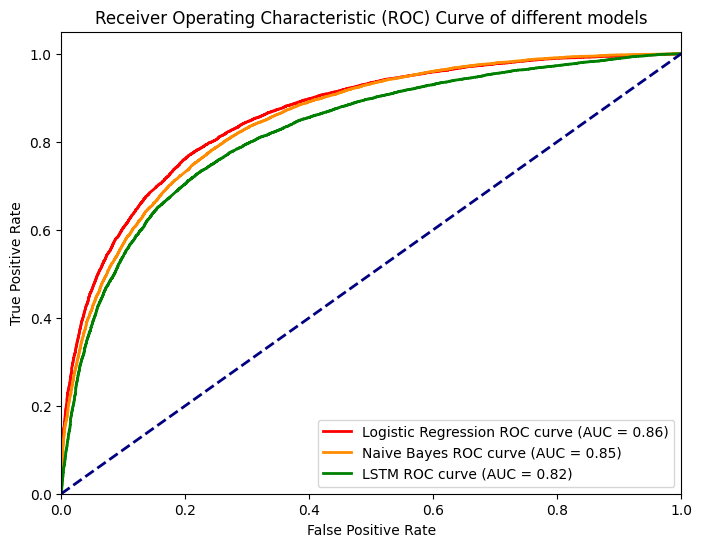

In [35]:
# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr,lr_tpr, color = 'red', lw = 2, label=f'Logistic Regression ROC curve (AUC = {lr_roc_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, color='darkorange', lw=2, label=f'Naive Bayes ROC curve (AUC = {nb_roc_auc:.2f})')
plt.plot(nn_fpr,nn_tpr,color = 'green', lw = 2, label=f'LSTM ROC curve (AUC = {nn_roc_auc:.2f})' )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of different models')
plt.legend(loc="lower right")
plt.show()

#Predicting on new tweets

In [36]:
# Defining a function that takes in a tweet and outputs whether the tweet is predicted to be positive or negative
def predict_tweet(tweet):
  text = clean_tweet(tweet)
  m = vectorizer.transform([text])
  prediction = log_reg.predict(m)
  return 'The sentiment of this tweet is predicted to be positive' if prediction == 1 else 'The sentiment of this tweet is predicted to be negative'


In [37]:
positive_tweet = '''
Just got my hands on the new #iPhone15 and it's a game-changer!
The camera quality is unmatched, the sleek design is next level, and the performance is lightning-fast.
Apple continues to raise the bar with innovation.
Loving every moment with this beauty! 📱✨ #TechInnovation
'''

In [38]:
predict_tweet(positive_tweet)

'The sentiment of this tweet is predicted to be positive'

In [39]:
negative_tweet ='''
Disappointed with the new #iPhone15.
Expected a lot more for the hefty price tag.
The battery life is not as promised, and the software seems a bit buggy.
The upgrades feel incremental, and there's nothing groundbreaking.
Not the upgrade I was hoping for. 😕📱 #TechLetdown"
'''

In [40]:
predict_tweet(negative_tweet)

'The sentiment of this tweet is predicted to be negative'

It appears that our model is doing a pretty decent job in predicting whether a tweet sentiment is positive or negative!